# Differential Expression Analysis using PyDeSeq2
## [GSE154844 (Listeria monocytogenes)](https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE154844)
### Title
Chitin attenurates virulence gene expression of listeria monocytogene (Bacteria) in vitro
### Design
Comparison of the transcriptomic profile of L. monocytogenes under virulence inducing conditions with and without chitin.
### Sample ID's
* GSM4681475    C1: GlyLEP1
* GSM4681476    C2: GlyLEP2
* GSM4681477    C3: GlyLEP3
* GSM4681478    CT1: GlyandChitinLEP1
* GSM4681479    CT2: GlyandChitinLEP2
* GSM4681480    CT3: GlyandChitinLEP3
#### Name: Aniket Yadav (20BTBINF003)

In [2]:
# %pip install pydeseq2
# %pip install scanpy # for performing PCA analysis and differential expression analysis
# %pip install sanbomics # use to convert ENS id's to gene symbols
# %pip install gseapy # python package for gene set enrichment analysis

In [3]:
# Import libraries 
# type: ignore
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

from pydeseq2.dds import DeseqDataSet
from pydeseq2.ds import DeseqStats
import scanpy as sp

In [4]:
fileName = "B:/Major_project/Workspace/GSE154844_family/GSE154844_Raw_counts.csv"

counts = pd.read_csv(fileName)
print(counts.shape)
counts["gene_symbol"] = counts['gene_symbol'].apply(lambda x: x.upper())
counts = counts.set_index("gene_symbol") # set index as gene_symbol
counts = counts[counts.sum(axis=1) > 0] # filter out, if any of all samples show zero gene expressed
counts

(2665, 7)


raw GlyLEP1  raw GlyLEP2  raw GlyLEP3  raw GlyandChitinLEP1  \
gene_symbol                                                                
ACCA                 897          730          656                  1623   
ACCD                 612          527          545                  1219   
ACKA1               1029          856          612                  3366   
ACKA2                 85           89           86                   191   
ACNA                4700         2152         2215                  4207   
...                  ...          ...          ...                   ...   
YYCG                1184         1466         1299                  1832   
YYCH                1092         1336         1079                  1696   
YAAA                 324          342          241                   444   
ZURA                 260          298          246                   793   
ZWF                 3751         4439         3723                  5978   

             raw GlyandChitinLEP2  raw GlyandChitinLEP3  
gene_symbol                                              
ACCA                         1624                   142  
ACCD                         1030                    57  
ACKA1                        2878                   232  
ACKA2                         161                    14  
ACNA                         4482                   521  
...                           ...                   ...  
YYCG                         1447                    69  
YYCH                         1380                    65  
YAAA                          381                    30  
ZURA                          689                    68  
ZWF                          4915                   297  

[2663 rows x 6 columns]

In [5]:
counts = counts.loc[~counts.index.duplicated(keep='first')] # remove all the duplicate columns at the level of joining
counts = counts.T # transpose

In [6]:
# Create metadata for count set
metadata = pd.DataFrame(zip(counts.index, ['C', 'C', 'C', 'CT', 'CT', 'CT']), columns=["Sample", "Condition"])
metadata = metadata.set_index("Sample")
metadata

Condition
Sample                        
raw GlyLEP1                  C
raw GlyLEP2                  C
raw GlyLEP3                  C
raw GlyandChitinLEP1        CT
raw GlyandChitinLEP2        CT
raw GlyandChitinLEP3        CT

In [7]:
dds = DeseqDataSet(counts=counts, metadata=metadata, design_factors="Condition")
# design_factors=["batch", "condition"] == ~ batch + condition

# dds.X (matrix of counts)
# dds.obs (shows metadata)
# dds.var (shows geneid's)

In [8]:
dds.deseq2() # run deseq2...

Fitting size factors...
... done in 0.00 seconds.

Fitting dispersions...
... done in 0.98 seconds.

Fitting dispersion trend curve...
a:\python3.10\lib\site-packages\pydeseq2\dds.py:590: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend()
... done in 0.10 seconds.

Fitting MAP dispersions...
... done in 1.20 seconds.

Fitting LFCs...
... done in 0.70 seconds.

Replacing 0 outlier genes.



In [9]:
dds

AnnData object with n_obs × n_vars = 6 × 2609
    obs: 'Condition'
    uns: 'mean_disp', 'disp_function_type', '_squared_logres', 'prior_disp_var'
    obsm: 'design_matrix', 'size_factors', 'replaceable'
    varm: 'non_zero', '_MoM_dispersions', 'genewise_dispersions', '_genewise_converged', '_normed_means', 'fitted_dispersions', 'MAP_dispersions', '_MAP_converged', 'dispersions', '_outlier_genes', 'LFC', '_LFC_converged', 'replaced', 'refitted'
    layers: 'normed_counts', '_mu_hat', '_mu_LFC', '_hat_diagonals', 'cooks'

In [10]:
# Normalized expression
conditions = ['control', 'control', 'control', 'treated', 'treated', 'treated']
norm = pd.DataFrame(dds.layers['normed_counts'].T, index=dds.var_names, columns=conditions) # type: ignore
(group_control, treated_group) = (norm.iloc[:,:3].sum(axis=1)/3, norm.iloc[:, 3:6].sum(axis=1)/3)
norm = norm.assign(grp_control = group_control)
norm = norm.assign(grp_treat = treated_group)
norm.to_csv('normalized.csv')
norm

control      control      control      treated      treated  \
gene_symbol                                                                    
ACCA          680.366131   501.936328   529.449780   830.774728   872.535088   
ACCD          464.196290   362.356774   439.863003   623.976829   553.393560   
ACKA1         780.486899   588.571913   493.937905  1722.974575  1546.278315   
ACKA2          64.471707    61.194977    69.409575    97.768314    86.501323   
ACNA         3564.906148  1479.680791  1787.700097  2153.462281  2408.067898   
...                  ...          ...          ...          ...          ...   
YYCG          898.052953  1007.998160  1048.407416   937.756810   777.437360   
YYCH          828.271811   918.612238   870.848038   868.141675   741.439915   
YAAA          245.750977   235.153732   194.508227   227.272939   204.701890   
ZURA          197.207574   204.900035   198.543668   405.917658   370.182682   
ZWF          2845.098503  3052.185423  3004.788921  3059.994656  2640.708103   

                 treated  grp_control    grp_treat  
gene_symbol                                         
ACCA         1159.833870   570.584080   954.381229  
ACCD          465.567117   422.138689   547.645835  
ACKA1        1894.939844   620.998906  1721.397578  
ACKA2         114.349818    65.025420    99.539818  
ACNA         4255.446805  2277.429012  2938.992328  
...                  ...          ...          ...  
YYCG          563.581247   984.819509   759.591806  
YYCH          530.909870   872.577363   713.497153  
YAAA          245.035325   225.137645   225.670051  
ZURA          555.413403   200.217092   443.837914  
ZWF          2425.849714  2967.357616  2708.850824  

[2609 rows x 8 columns]

In [11]:
sts_res = DeseqStats(dds, contrast=["Condition", "CT", "C"])
sts_res.summary()

Running Wald tests...


Log2 fold change & Wald test p-value: Condition CT vs C
                baseMean  log2FoldChange     lfcSE      stat        pvalue  \
gene_symbol                                                                  
ACCA          762.482654        0.726329  0.261486  2.777693  5.474634e-03   
ACCD          484.892262        0.397658  0.230731  1.723470  8.480358e-02   
ACKA1        1171.198242        1.466833  0.269203  5.448806  5.070902e-08   
ACKA2          82.282619        0.551071  0.251880  2.187827  2.868222e-02   
ACNA         2608.210670        0.364796  0.496960  0.734056  4.629146e-01   
...                  ...             ...       ...       ...           ...   
YYCG          872.205657       -0.353112  0.267982 -1.317672  1.876136e-01   
YYCH          793.037258       -0.266016  0.256209 -1.038278  2.991407e-01   
YAAA          225.403848       -0.023265  0.222744 -0.104446  9.168151e-01   
ZURA          322.027503        1.104782  0.240409  4.595432  4.318531e-06   
ZWF     

... done in 0.41 seconds.



In [12]:
sts_res = sts_res.results_df # create pandas dataframe of the deseq stat result using results_df method

In [13]:
# filter the genes are more expressed...
sts_res = sts_res[sts_res.baseMean >= 10] # check, if base mean larger than or equal to 10 
sts_res

baseMean  log2FoldChange     lfcSE      stat        pvalue  \
gene_symbol                                                                  
ACCA          762.482654        0.726329  0.261486  2.777693  5.474634e-03   
ACCD          484.892262        0.397658  0.230731  1.723470  8.480358e-02   
ACKA1        1171.198242        1.466833  0.269203  5.448806  5.070902e-08   
ACKA2          82.282619        0.551071  0.251880  2.187827  2.868222e-02   
ACNA         2608.210670        0.364796  0.496960  0.734056  4.629146e-01   
...                  ...             ...       ...       ...           ...   
YYCG          872.205657       -0.353112  0.267982 -1.317672  1.876136e-01   
YYCH          793.037258       -0.266016  0.256209 -1.038278  2.991407e-01   
YAAA          225.403848       -0.023265  0.222744 -0.104446  9.168151e-01   
ZURA          322.027503        1.104782  0.240409  4.595432  4.318531e-06   
ZWF          2838.104220       -0.125375  0.173179 -0.723961  4.690895e-01   

                 padj  
gene_symbol            
ACCA         0.036038  
ACCD         0.222669  
ACKA1        0.000005  
ACKA2        0.108891  
ACNA         0.643317  
...               ...  
YYCG         0.365582  
YYCH         0.493666  
YAAA         0.953298  
ZURA         0.000173  
ZWF          0.646546  

[2433 rows x 6 columns]

In [14]:
# differentially expressed genes (significant or non significants)
# check, where log2FoldChange > 0.5 and padj value < 0.05
# norm = norm.reset_index()
sigs = sts_res[(abs(sts_res.log2FoldChange) > 0.5) & (sts_res.padj < 0.05)].reset_index()
norm = sigs.merge(norm, 'inner', on='gene_symbol').set_index('gene_symbol')
norm

baseMean  log2FoldChange     lfcSE       stat        pvalue  \
gene_symbol                                                                    
ACCA           762.482654        0.726329  0.261486   2.777693  5.474634e-03   
ACKA1         1171.198242        1.466833  0.269203   5.448806  5.070902e-08   
ACTA         23719.959715       -8.206987  0.779072 -10.534311  6.002120e-26   
ALAS          1636.864382        0.919739  0.211862   4.341221  1.416933e-05   
ALSD          1245.880589        1.515681  0.460927   3.288334  1.007824e-03   
...                   ...             ...       ...        ...           ...   
XPT           1701.973621        1.578829  0.545895   2.892182  3.825762e-03   
YICI           110.747682        0.893365  0.293969   3.038979  2.373817e-03   
YJCE           780.570419       -0.818001  0.300746  -2.719902  6.530125e-03   
YQGF          2144.458657       -0.623977  0.188500  -3.310220  9.322270e-04   
ZURA           322.027503        1.104782  0.240409   4.595432  4.318531e-06   

                     padj      control       control       control  \
gene_symbol                                                          
ACCA         3.603750e-02   680.366131    501.936328    529.449780   
ACKA1        4.583316e-06   780.486899    588.571913    493.937905   
ACTA         1.410498e-22  9115.540870  46544.624434  86181.672242   
ALAS         3.917403e-04   974.660511   1155.828722   1255.021964   
ALSD         1.046493e-02   597.690648    702.710859    628.721614   
...                   ...          ...           ...           ...   
XPT          2.767089e-02   973.143529    756.342412    824.844017   
YICI         2.004305e-02    92.535862     60.507393     77.480456   
YJCE         4.136333e-02  1017.894479   1006.622992    985.454545   
YQGF         9.912821e-03  2333.117300   2534.434663   2920.851761   
ZURA         1.728117e-04   197.207574    204.900035    198.543668   

                 treated      treated      treated   grp_control    grp_treat  
gene_symbol                                                                    
ACCA          830.774728   872.535088  1159.833870    570.584080   954.381229  
ACKA1        1722.974575  1546.278315  1894.939844    620.998906  1721.397578  
ACTA          128.992749   210.074643   138.853351  47280.612515   159.306914  
ALAS         2048.015828  1945.473864  2442.185402   1128.503732  2145.225031  
ALSD         1014.538208  1566.694777  2964.927428    643.041040  1848.720138  
...                  ...          ...          ...           ...          ...  
XPT          1201.884820  1955.144819  4500.482129    851.443320  2552.503923  
YICI          153.050920   125.722420   155.189039     76.841237   144.654127  
YJCE          721.233267   576.496398   375.720831   1003.324005   557.816832  
YQGF         1664.108837  1568.306603  1845.932779   2596.134575  1692.782739  
ZURA          405.917658   370.182682   555.413403    200.217092   443.837914  

[404 rows x 14 columns]

In [15]:
# save the data that is significant
norm.to_csv("B:/Major_project/Workspace/GSE154844_family/DifferentiallySignificant.csv")

## Plot PCA Chart

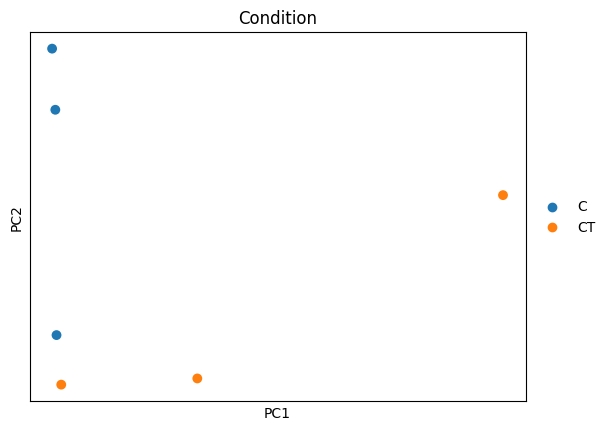

In [16]:
# PCA plot for 200 of size
sp.tl.pca(dds)
sp.pl.pca(dds, color="Condition", size=200)

## Plot Heatmap for the significant or differentially expressed genes

In [17]:
# Heatmap
# create a new layer as 'log1p' and store log1p values for normalized values of the count set
dds.layers['log1p'] = np.log1p(dds.layers['normed_counts'])
dds

AnnData object with n_obs × n_vars = 6 × 2609
    obs: 'Condition'
    uns: 'mean_disp', 'disp_function_type', '_squared_logres', 'prior_disp_var', 'pca', 'Condition_colors'
    obsm: 'design_matrix', 'size_factors', 'replaceable', 'X_pca'
    varm: 'non_zero', '_MoM_dispersions', 'genewise_dispersions', '_genewise_converged', '_normed_means', 'fitted_dispersions', 'MAP_dispersions', '_MAP_converged', 'dispersions', '_outlier_genes', 'LFC', '_LFC_converged', 'replaced', 'refitted', 'PCs'
    layers: 'normed_counts', '_mu_hat', '_mu_LFC', '_hat_diagonals', 'cooks', 'log1p'

In [18]:
dds_sigs = dds[:, sigs.index]
dds_sigs

View of AnnData object with n_obs × n_vars = 6 × 404
    obs: 'Condition'
    uns: 'mean_disp', 'disp_function_type', '_squared_logres', 'prior_disp_var', 'pca', 'Condition_colors'
    obsm: 'design_matrix', 'size_factors', 'replaceable', 'X_pca'
    varm: 'non_zero', '_MoM_dispersions', 'genewise_dispersions', '_genewise_converged', '_normed_means', 'fitted_dispersions', 'MAP_dispersions', '_MAP_converged', 'dispersions', '_outlier_genes', 'LFC', '_LFC_converged', 'replaced', 'refitted', 'PCs'
    layers: 'normed_counts', '_mu_hat', '_mu_LFC', '_hat_diagonals', 'cooks', 'log1p'

In [19]:
heat_graph = pd.DataFrame(dds_sigs.layers['log1p'].T, index=dds_sigs.var_names, columns=dds_sigs.obs_names)
# where, obs_names stands for sample names
# and var_names stands for gene id or names
heat_graph

Sample       raw GlyLEP1  raw GlyLEP2  raw GlyLEP3  raw GlyandChitinLEP1  \
gene_symbol                                                                
ACCA            6.524100     6.220464     6.273725              6.723562   
ACCD            6.142459     5.895385     6.088734              6.437715   
ACKA1           6.661198     6.379397     6.204432              7.452388   
ACKA2           4.181618     4.130274     4.254329              4.592777   
ACNA            8.179173     7.300257     7.489244              7.675296   
...                  ...          ...          ...                   ...   
LIN1086         3.343062     3.350022     3.319044              3.318451   
LIN1654         4.146245     3.506051     3.702470              3.818442   
LIN1776         4.341843     3.962123     4.119551              4.158270   
LIN2007         5.651350     5.654802     5.721204              5.723840   
LIN2017         4.417840     4.283707     4.106348              4.448043   

Sample       raw GlyandChitinLEP2  raw GlyandChitinLEP3  
gene_symbol                                              
ACCA                     6.772548              7.056894  
ACCD                     6.317875              6.145402  
ACKA1                    7.344253              7.547470  
ACKA2                    4.471654              4.747969  
ACNA                     7.786995              8.356190  
...                           ...                   ...  
LIN1086                  2.840146              2.215702  
LIN1654                  3.972473              4.747969  
LIN1776                  4.275559              3.912164  
LIN2007                  5.664495              5.659045  
LIN2017                  4.139743              2.852767  

[404 rows x 6 columns]

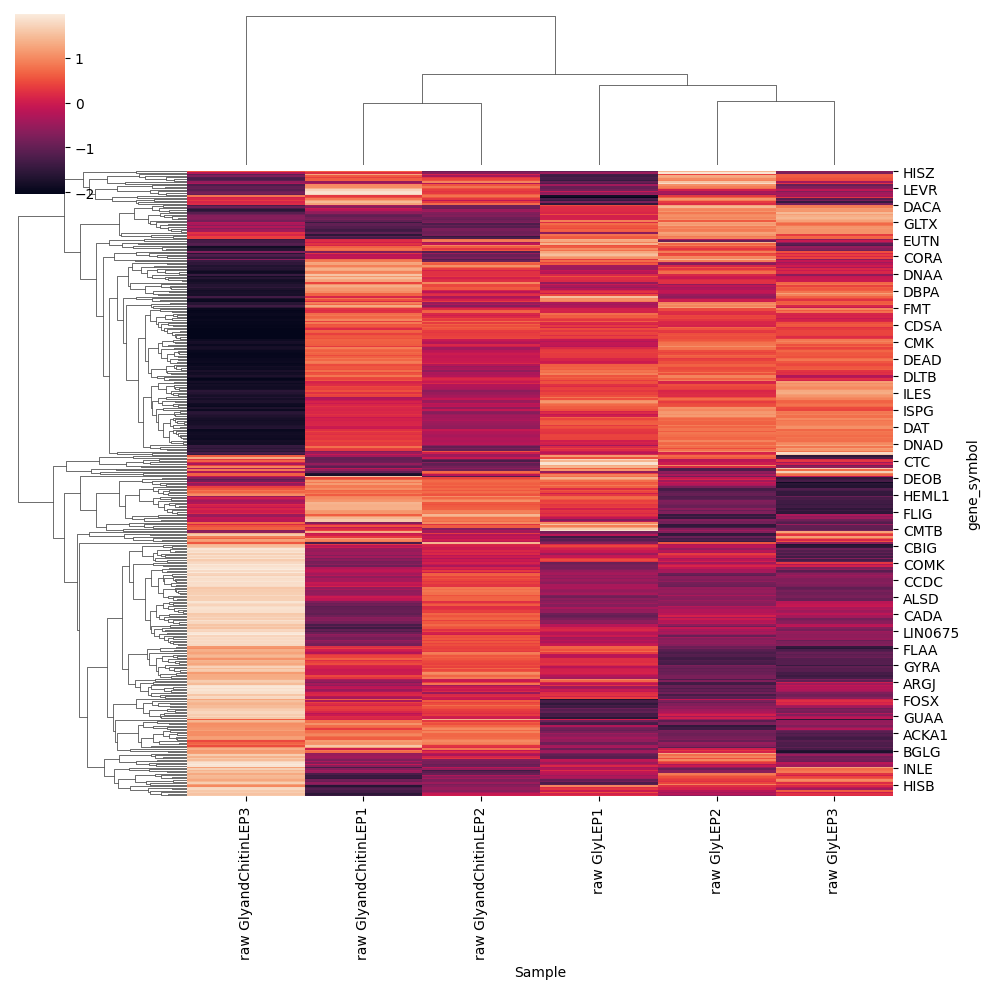

In [20]:
sns.clustermap(heat_graph, z_score=0)

## Regulations

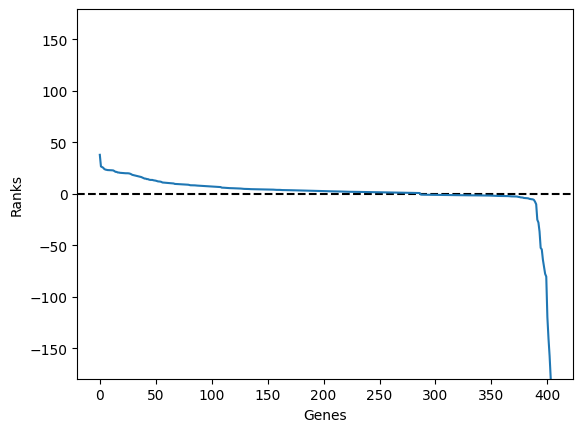

In [21]:
df_sigs = pd.read_csv('DifferentiallySignificant.csv')
ranks = (-np.log10(df_sigs.padj)*df_sigs.log2FoldChange).sort_values(ascending=False) # type: ignore
# ranks = df_sigs.log2FoldChange.sort_values(ascending=False)
plt.ylim(min(list(ranks)), abs(min(list(ranks))))
plt.axhline(0, c='black', ls='--') 
plt.xlabel('Genes')
plt.ylabel('Ranks')
plt.plot([i for i in range(len(ranks))], list(ranks))

In [22]:
up_reg = list(df_sigs.gene_symbol[df_sigs.log2FoldChange > 0]) # UPREGULATED
down_reg = list(df_sigs.gene_symbol[df_sigs.log2FoldChange < 0]) # DOWNREGULATED
print(len(up_reg), len(down_reg))

287 117


## Expression Groups

C:\Users\lenovo\AppData\Local\Temp\ipykernel_12436\2977428639.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  controlCondition['avgControl'] = controlCondition.sum(axis=1)/controlCondition.shape[1]
C:\Users\lenovo\AppData\Local\Temp\ipykernel_12436\2977428639.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  treatedCondition['avgTreated'] = treatedCondition.sum(axis=1)/treatedCondition.shape[1]


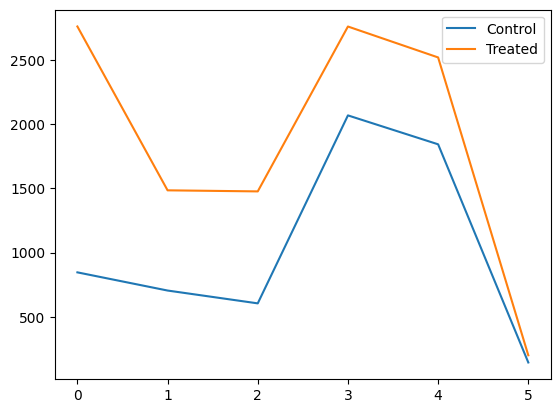

In [23]:
(controlCondition, treatedCondition) = (counts.iloc[:,:3], counts.iloc[:, 3:6])
controlCondition['avgControl'] = controlCondition.sum(axis=1)/controlCondition.shape[1]
treatedCondition['avgTreated'] = treatedCondition.sum(axis=1)/treatedCondition.shape[1]

lens_of_gene = range(controlCondition.shape[0])
# plt.ylim(min(treatedCondition.avgTreated), max(treatedCondition.avgTreated))
plt.plot(lens_of_gene, controlCondition.avgControl, label='Control')
plt.plot(lens_of_gene, treatedCondition.avgTreated, label='Treated')
plt.legend()

## GSEA (Gene Set Enrichment Analysis) using GSEApy

In [24]:
# sigs['Rank'] = -np.log10(sigs.padj)*sigs.log2FoldChange

In [25]:
ranking = sigs[['gene_symbol', 'stat']].dropna().sort_values('stat', ascending=False)
ranking['gene_symbol'] = ranking['gene_symbol'].apply(lambda u: u.upper())
ranking = ranking.drop_duplicates('gene_symbol')
ranking

gene_symbol       stat
375        RPSG   7.227997
327        PURE   6.780533
374        RPSF   6.689017
16         CSHA   6.628659
328        PURK   6.486958
..          ...        ...
38          HLY  -8.229091
355       RLI74  -9.203232
319        PLCA  -9.404192
320        PLCB -10.102389
2          ACTA -10.534311

[404 rows x 2 columns]

In [26]:
# gea.get_library_name()

In [27]:
# pregeaBP = gea.enrichr(gene_list=ranking['gene_symbol'],
#                     gene_sets=['GO_Biological_Process_2021', 'GO_Biological_Process_2023',
#                                'GO_Biological_Process_2013', 'GO_Biological_Process_2015', 
#                                'GO_Biological_Process_2017', 'GO_Biological_Process_2017b', 
#                                'GO_Biological_Process_2018'], cutoff = 0.5)

In [28]:
# pregeaBP.results.to_csv("B:/Major_project/Workspace/GSE154844_family/BP_GSEAnalysis.csv")
# pregeaBP.results

In [29]:
# ax = dotplot(pregeaBP.results, column="Adjusted P-value", title='GO_Biological_Process vs Combined Score', 
#              size=10, show_ring=True, cutoff=1)
# ax

In [30]:
# ax = barplot(pregeaBP.results, x='Gene_set', column="Adjusted P-value", title='GO_Biological_Process vs Gene_Set', 
#              size=10, show_ring=True, figsize=(6,6), xticklabels_rot=45, cutoff=1,
#             color = {'GO_Biological_Process_2021': 'red', 'GO_Biological_Process_2023': 'orange',
#                                'GO_Biological_Process_2013': 'blue', 'GO_Biological_Process_2015': 'green', 
#                                'GO_Biological_Process_2017': 'salmon', 'GO_Biological_Process_2017b': 'black', 
#                                'GO_Biological_Process_2018': 'yellow'})
# ax

In [31]:
# pregeakegg = gea.enrichr(gene_list=ranking['gene_symbol'],
#                     gene_sets=['KEGG_2013', 'KEGG_2015', 'KEGG_2016'], cutoff = 0.5)
# pregeakegg.results

## ShinyGO v0.80: Result analysis

In [32]:
# type: ignore
# create a function for plotting horizontal bars for enrich process OR pathways
def EnrichmentBars(foldEnrich, pathways, log10FDR, ngenes, plotitle, plotsize=(8, 4)):
    import matplotlib.pyplot as plt
    # Create a colormap
    cmap = plt.colormaps['viridis_r']
    fig, ax = plt.subplots(figsize=plotsize)
    # Normalize the values to the range of the colormap
    norm = plt.Normalize(vmin=min(log10FDR), vmax=max(log10FDR))
    # Create a list of colors
    colors = cmap(norm(log10FDR))

    # Create the bar plot
    for index, gene in enumerate(ngenes):
        ax.text(foldEnrich[index] + .2, index, str(gene))

    plt.barh(pathways, foldEnrich, color=colors)

    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])
    plt.colorbar(sm, ax=ax).set_label('-log10 (FDR)', rotation=270,labelpad=20)
    plt.title(f'Enrichment Plot: {plotitle}')
    plt.xlabel('Fold Enrichment')
    plt.show()

In [33]:
# Selected_databases = ['BP', 'MF', 'CC', 'InterPro', 'Pfam', 'Uniprot']

def result_reader(folder, fileAlise):
    import os
    dic = {}
    files = os.listdir(folder)
    if len(files) == fileAlise.__len__():
        print('Alise\t\tFilename\n---------------------------------')
        for i in range(len(files)):
            dic[fileAlise[i]] = pd.read_csv(folder+'/'+files[i])
            print(fileAlise[i], ':\t', files[i])
        return dic
    else: return 'Alise name for file must be same length as number of files containing in folder!'

sgoRes = result_reader('AnalysedShinyGO', 
                              ['bp', 'cc', 'mf', 'up'])

Alise		Filename
---------------------------------
bp :	 lisMonocyto_EnrichBP.csv
cc :	 lisMonocyto_EnrichCC.csv
mf :	 lisMonocyto_EnrichMF.csv
up :	 lisMonocyto_EnrichUniProt.csv


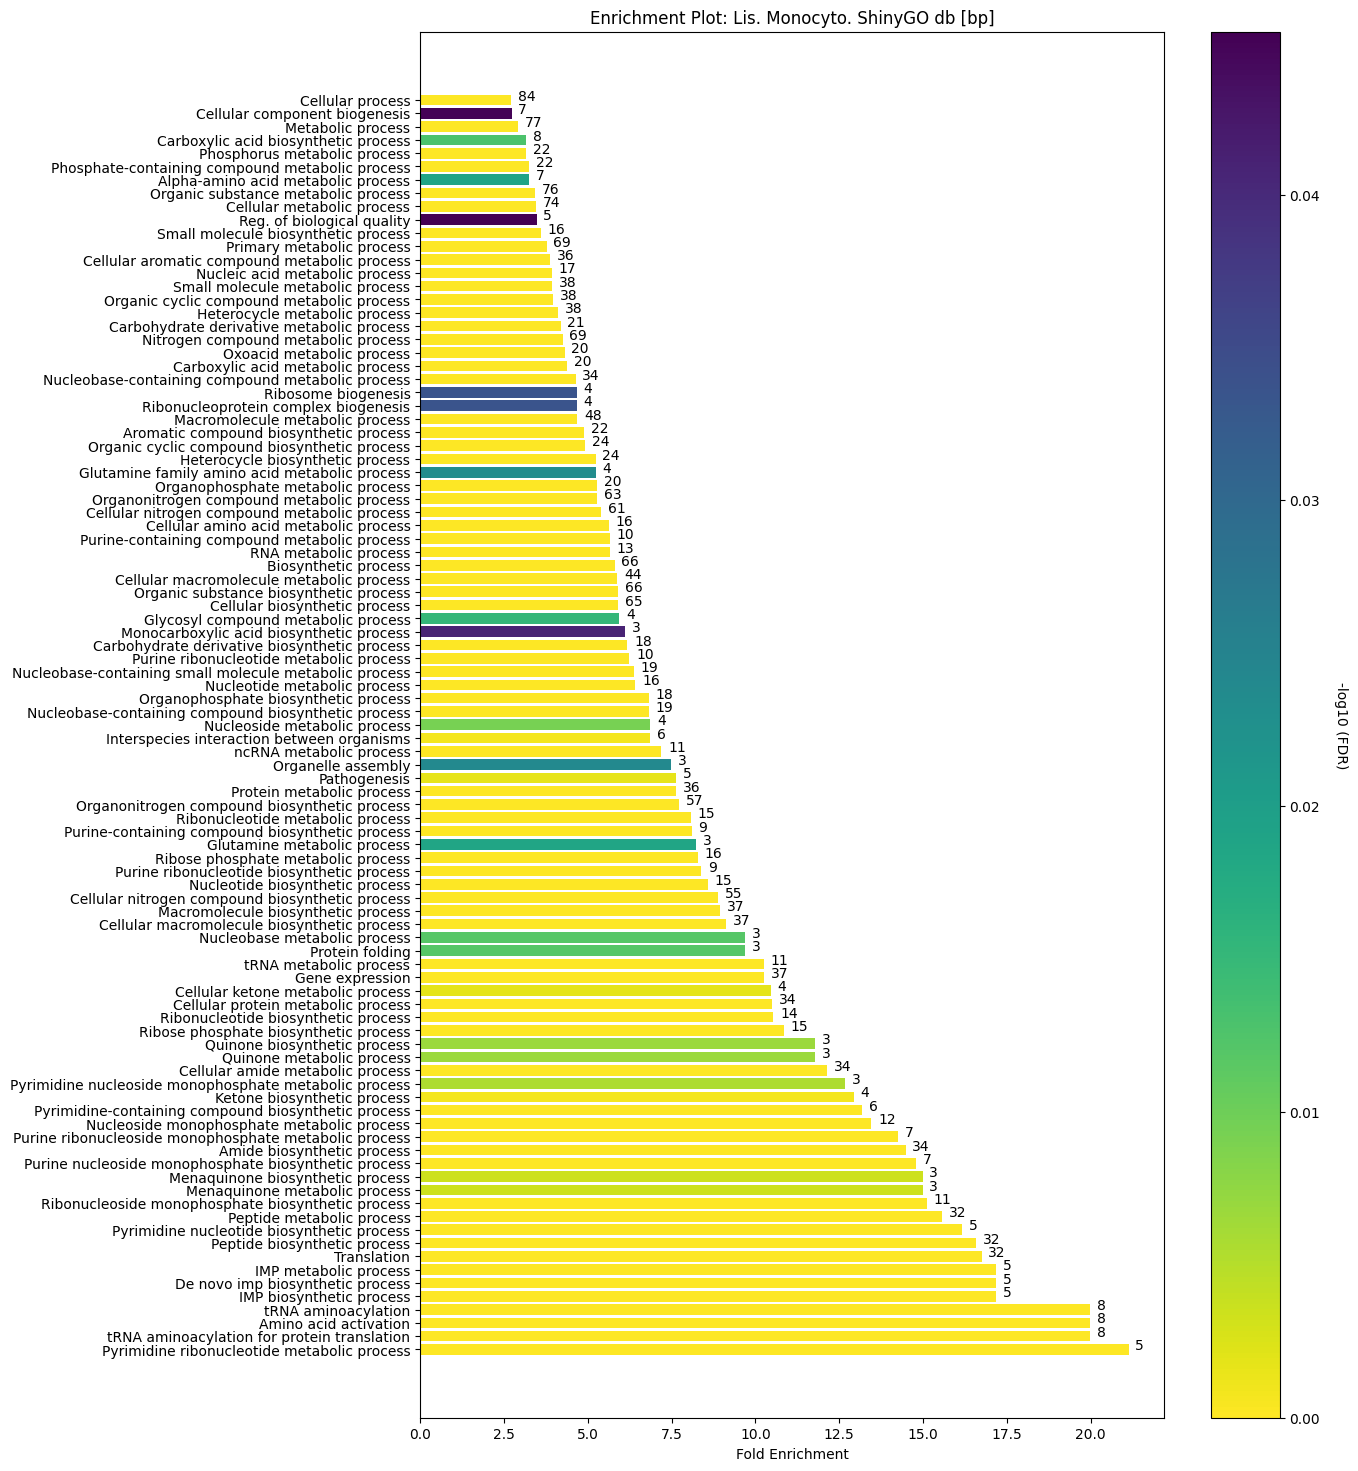

In [34]:
db = 'bp'
# type: ignore
pathways =   sgoRes[db].Pathway
foldEnrich = sgoRes[db].iloc[:, 3]
log10FDR =   sgoRes[db].iloc[:, 0]
ngenes =     sgoRes[db].nGenes
EnrichmentBars(foldEnrich, pathways, log10FDR, ngenes, 
               plotitle=f'Lis. Monocyto. ShinyGO db [{db}]', plotsize=(12, 18))

In [35]:
mid = foldEnrich.median()
print("mid: ", mid)
significantPathway = sgoRes[db][(foldEnrich > mid) & (log10FDR < 0.0000000005)]
significantPathway[["Pathway", "Genes"]]

mid:  6.86813186813187


Pathway  \
7                                       Translation   
8                      Peptide biosynthetic process   
10                        Peptide metabolic process   
15                       Amide biosynthetic process   
17       Nucleoside monophosphate metabolic process   
21                 Cellular amide metabolic process   
24            Ribose phosphate biosynthetic process   
25              Ribonucleotide biosynthetic process   
26               Cellular protein metabolic process   
28                                  Gene expression   
32      Cellular macromolecule biosynthetic process   
33               Macromolecule biosynthetic process   
34  Cellular nitrogen compound biosynthetic process   
37               Ribose phosphate metabolic process   
41     Organonitrogen compound biosynthetic process   
42                        Protein metabolic process   

                                                Genes  
7   CYSS RPMF TRPS GLYS GLYQ ALAS VALS THRS RPSD L...  
8   CYSS RPMF TRPS GLYS GLYQ ALAS VALS THRS RPSD L...  
10  CYSS RPMF TRPS GLYS GLYQ ALAS VALS THRS RPSD L...  
15  CYSS RPMF TRPS GLYS GLYQ ALAS VALS THRS ACCA R...  
17  PRS PYRH PURQ PURS PURC PURK PURE CARA PYRC PY...  
21  CYSS RPMF TRPS GLYS GLYQ ALAS VALS THRS ACCA R...  
24  DACA PRS PYRH ACCA PURQ PURS PURC PURK PURE CA...  
25  DACA PYRH ACCA PURQ PURS PURC PURK PURE CARA P...  
26  CYSS RPMF TRPS GLYS GLYQ ALAS VALS THRS RPSD L...  
28  CYSS RLMN RPMF QUEG TRPS GLYS GLYQ ALAS VALS T...  
32  GLMU CYSS RPMF MURF TRPS GLYS GLYQ ALAS VALS T...  
33  GLMU CYSS RPMF MURF TRPS GLYS GLYQ ALAS VALS T...  
34  DACA GLMU PRS CYSS RPMF QUEG TRPS PYRH GLYS GL...  
37  DACA PRS PDHA PYRH ACCA PURQ PURS PURC PURK PU...  
41  DACA GLMU CYSS RPMF MURF QUEG TRPS PYRH GLYS G...  
42  MPL CYSS RPMF TRPS HSLU GLYS GLYQ ALAS VALS TH...

In [36]:
# type: ignore
pathwayName = 'Stress response'
list(sgoRes['up'].Genes[sgoRes['up'].Pathway == pathwayName])[0].split(' ')

['CSHA', 'CLPB', 'OPUCD', 'GROEL']

## STRING v12.0: Result Analysis

In [37]:
STRINGfilepath = "STRING_Analysis"
STRING_enrich = pd.read_table(STRINGfilepath+"/STRINGenrich.tsv").set_index('#category')
STRING_enrich.head()

term ID  \
#category                     
GO Function      GO:0008081   
GO Function      GO:0042578   
GO Component     GO:0005576   
STRING clusters     CL:5374   
STRING clusters     CL:5375   

                                                  term description  \
#category                                                            
GO Function                  Phosphoric diester hydrolase activity   
GO Function                    Phosphoric ester hydrolase activity   
GO Component                                  Extracellular region   
STRING clusters  Mixed, incl. Coiled coil, and Cro/C1-type heli...   
STRING clusters  Mixed, incl. Coiled coil, and Cro/C1-type heli...   

                 genes mapped  enrichment score direction  \
#category                                                   
GO Function                 3           6.79824       top   
GO Function                 5           4.99231       top   
GO Component               10           5.04105       top   
STRING clusters            68           6.64055    bottom   
STRING clusters            53           7.14734    bottom   

                 false discovery rate method  \
#category                                      
GO Function              1.900000e-03    afc   
GO Function              2.500000e-03    afc   
GO Component             4.480000e-06    afc   
STRING clusters          5.930000e-24     ks   
STRING clusters          6.370000e-21     ks   

                             matching proteins in your input (IDs)  \
#category                                                            
GO Function      169963.gene:17592837,169963.gene:17592841,1699...   
GO Function      169963.gene:17592837,169963.gene:17592841,1699...   
GO Component     169963.gene:17592837,169963.gene:17592838,1699...   
STRING clusters  169963.gene:17592751,169963.gene:17592752,1699...   
STRING clusters  169963.gene:17594962,169963.gene:17594963,1699...   

                          matching proteins in your input (labels)  
#category                                                           
GO Function                                      plcA,plcB,lmo0616  
GO Function                          plcA,plcB,lmo0616,fbp,lmo2208  
GO Component     plcA,hly,mpl,inlG,lmo0415,inlA,inlB,inlC,lmo24...  
STRING clusters  lmaD,lmaC,lmaB,lmaA,lmo0119,lmo0120,lmo0121,lm...  
STRING clusters  lmo2271,lmo2272,lmo2273,lmo2274,lmo2275,lmo227...

In [38]:
PDclusters = pd.read_table(STRINGfilepath+"/string_kmeans_clusters.tsv").set_index('#clustering method')
PDclusters

cluster number cluster color  gene count protein name  \
#clustering method                                                          
kmeans                           1           Red         170         ackA   
kmeans                           1           Red         170         alaS   
kmeans                           1           Red         170         argG   
kmeans                           1           Red         170         clpB   
kmeans                           1           Red         170         clpQ   
...                            ...           ...         ...          ...   
kmeans                           4          Cyan          18         plcA   
kmeans                           4          Cyan          18         plcB   
kmeans                           4          Cyan          18         uhpT   
kmeans                           5          Blue           2      lmo2208   
kmeans                           5          Blue           2      lmo2209   

                      protein identifier  \
#clustering method                         
kmeans              169963.gene:17594238   
kmeans              169963.gene:17594161   
kmeans              169963.gene:17594776   
kmeans              169963.gene:17594897   
kmeans              169963.gene:17593935   
...                                  ...   
kmeans              169963.gene:17592837   
kmeans              169963.gene:17592841   
kmeans              169963.gene:17593489   
kmeans              169963.gene:17594899   
kmeans              169963.gene:17594900   

                                                  protein description  
#clustering method                                                     
kmeans              Acetate kinase 1; Catalyzes the formation of a...  
kmeans              alanyl-tRNA synthetase; Catalyzes the attachme...  
kmeans              Similar to argininosuccinate synthase; Belongs...  
kmeans              Chaperone protein ClpB; Part of a stress-induc...  
kmeans              ATP-dependent protease subunit HslV; Protease ...  
...                                                               ...  
kmeans              Phosphatidylinositol-specific phospholipase c;...  
kmeans              Phospholipase C; Important role in the infecti...  
kmeans              UhpT protein; Highly similar to hexose phospha...  
kmeans                                               Lmo2208 protein.  
kmeans                                               Lmo2209 protein.  

[322 rows x 6 columns]

In [42]:
_ID = "opucd" # FOR SHINYGO
fcgenes = pd.read_csv("fcValue.csv")
fcgenes[fcgenes.iloc[:,0].isin([_ID.upper()])]

gene_symbol  log2FoldChange
310       OPUCD        2.316612

### Name: Aniket Yadav
#### ID: 20BTBINF003